# Exploration

Exploring the preprocessed raw data

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

sns.set()
plt.rcParams['font.size'] = 16
plt.rcParams['axes.facecolor'] = 'white'

%matplotlib inline

In [17]:
def gen_stats(df):
    
    return [np.max(df.values), np.min(df.values), np.std(df.values)]

In [2]:
orig_pvalues = pd.read_csv('./../data/train/orig_pvalues_prep.csv', sep=',', index_col=0)
orig_ccp = pd.read_csv('./../data/train/orig_pcc_prep.csv', sep=',', index_col=0)

In [3]:
sel_pvalues = pd.read_csv('./../data/train/significant_pvalues_prep.csv', sep=',', index_col=0)
sel_ccp = pd.read_csv('./../data/train/significant_pcc_prep.csv', sep=',', index_col=0)

In [20]:
stats_sel_pvalues, stats_org_pvalues = gen_stats(orig_pvalues), gen_stats(sel_pvalues)
stats_org_pcc, stats_sel_pcc = gen_stats(orig_ccp), gen_stats(sel_ccp)

df = pd.DataFrame(
    np.array(
        [stats_org_pvalues, stats_org_pcc, stats_sel_pvalues, stats_sel_pcc], 
        dtype=float
    ),
    columns=['Max', 'Min', 'Std'], 
    index=['org_pvalues', 'org_ppc', 'sel_pvalues', 'sel_pcc']
)

print('Statistics: \n{}'.format(df))

Statistics: 
                      Max           Min           Std
org_pvalues  1.506513e-11  0.000000e+00  4.960937e-13
org_ppc      8.524432e-01 -8.669647e-01  3.232601e-01
sel_pvalues  1.000000e+00  1.280734e-32  2.256814e-01
sel_pcc      8.524432e-01 -8.669647e-01  6.393041e-02


In [7]:
print('Number of unique corrected p-values: {} and size of data matrix: {}'
      ''.format(np.unique(orig_pvalues.values).size, orig_pvalues.values.size)
)

Number of unique corrected p-values: 73422504 and size of data matrix: 73422504


In [8]:
print('Number of ccp unique values: {} and size of data matrix: {}'
      ''.format(np.unique(orig_ccp).size, orig_ccp.values.size)
)

Number of ccp unique values: 73422502 and size of data matrix: 73422504


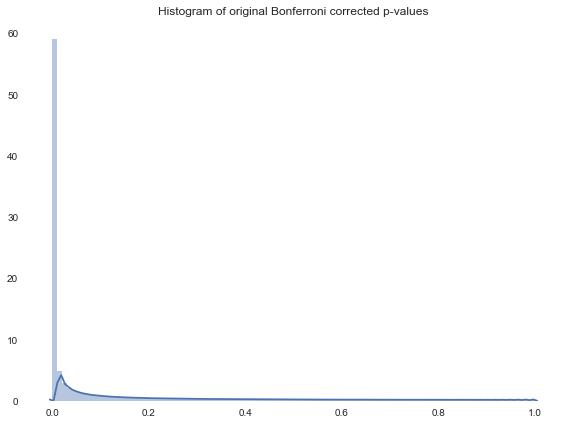

In [12]:
plt.figure(figsize=(8, 6))
plt.title('Histogram of original Bonferroni corrected p-values')
sns.distplot(orig_pvalues.values.ravel(), bins=100)
plt.tight_layout()

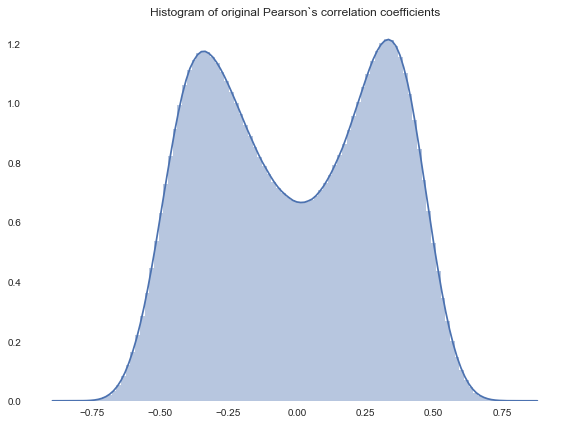

In [13]:
plt.figure(figsize=(8, 6))
plt.title('Histogram of original Pearson`s correlation coefficients')
sns.distplot(orig_ccp.values.ravel(), bins=100)
plt.tight_layout()

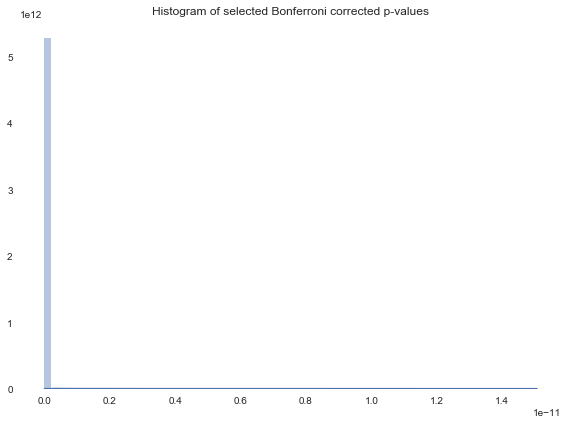

In [27]:
plt.figure(figsize=(8, 6))
plt.title('Histogram of selected Bonferroni corrected p-values')
sns.distplot(sel_pvalues.values.ravel(), bins=80)
plt.tight_layout()

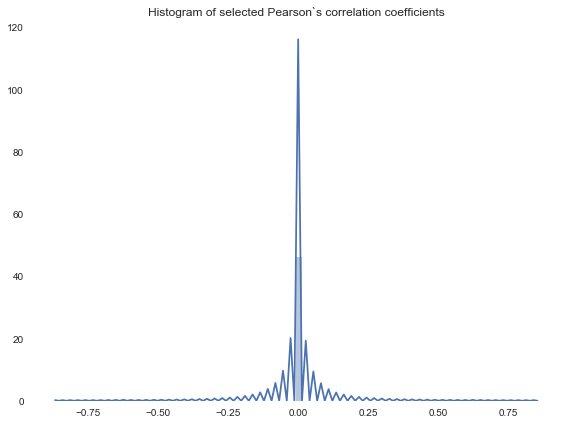

In [28]:
plt.figure(figsize=(8, 6))
plt.title('Histogram of selected Pearson`s correlation coefficients')
sns.distplot(sel_ccp.values.ravel(), bins=80)
plt.tight_layout()

In [ ]:
plt.figure(figsize=(10, 10))
plt.title('Original Bonferroni corrected p-values')
sns.heatmap(
    orig_pvalues.values, robust=True, cmap=plt.cm.RdBu_r, fmt='f', vmin=0, vmax=1
)
plt.tight_layout()
plt.savefig('./../data/imgs/org_pvalues.png')

In [ ]:
plt.figure(figsize=(10, 10))
plt.title('Original Pearson`s correlation coefficients')
sns.heatmap(
    orig_ccp.values, robust=True, cmap=plt.cm.RdBu_r, fmt='f', vmin=0, vmax=1
)
plt.tight_layout()
plt.savefig('./../data/imgs/org_ccp.png')

In [ ]:
plt.figure(figsize=(12, 12))
plt.title('Selected Bonferroni corrected p-values')
sns.heatmap(
    sel_pvalues.values, robust=True, cmap=plt.cm.RdBu_r, fmt='f', vmin=0, vmax=1
)
plt.tight_layout()
plt.savefig('./../data/imgs/sel_pvalues.png')

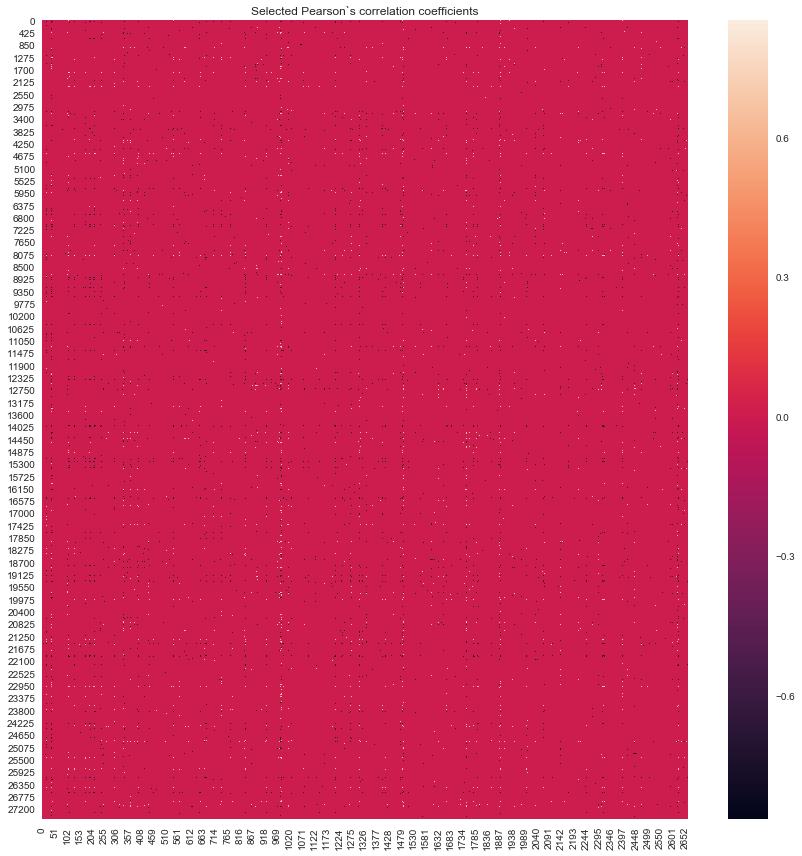

In [15]:
plt.figure(figsize=(12, 12))
plt.title('Selected Pearson`s correlation coefficients')
sns.heatmap(
    sel_ccp.values, robust=True, cmap=plt.cm.RdBu_r, fmt='f', vmin=0, vmax=1
)
sns.heatmap(sel_ccp.values)
plt.tight_layout()
plt.savefig('./../data/imgs/sel_ccp.png')